Lab 5 (part 1): PyTorch basics
In this lab we will use PyTorch to implement linear regression. We will implement Gradient Descent.

Let's first import what we need:

In [13]:

%matplotlib inline
import torch
import numpy as np
from matplotlib import pyplot as plt

1. Training set
The goal of linear regression is to fit a line to a set of points. We will generate a traing set of N = 100 random samples.

In [14]:
# Number of samples
N=100


x = torch.ones(N,2) # Tensor
x[:,0].uniform_(-1.,1)
print(x[:5])

tensor([[-0.1860,  1.0000],
        [-0.3035,  1.0000],
        [ 0.1091,  1.0000],
        [-0.9792,  1.0000],
        [-0.3637,  1.0000]])


What do you think the column of 1's is used for?
used as a starting point for generating samples for the linear regression model


What does the function .uniform_() do?
it generates a uniform distribution of samples using


PyTorch functions with suffix _ have a special meaning. Can you figure out what they mean?

 change the tensor in-place. That means that no new memory is being allocated by doing the operation, which in general

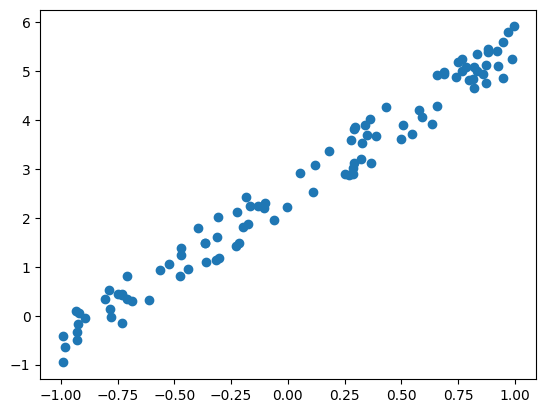

In [15]:


w = np.array([3.,2]).astype(np.float32) # Numpy array
w = torch.from_numpy(w) # Tensor
w


y = x@w + torch.rand(N)


plt.scatter(x[:,0], y);


2. Loss function
We want to find weights w such that we minimize the error between the points and the line x@w. Note that here w is unknown. For a regression problem the most common error function or loss function is the mean squared error or quadratic error:

In [16]:
def mse(x_pred, y_label):
  mse = ((x_pred-y_label) ** 2).mean()
  return mse


Suppose we hypothesize that w = (-1.0,1.0). Then we can compute y_hat which is our prediction and then compute our error.

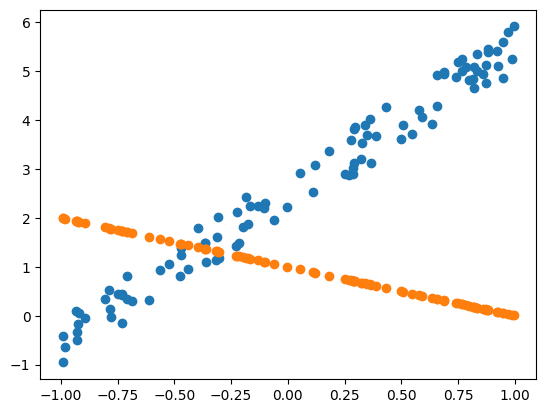

In [17]:
w = np.array([-1, 1]).astype(np.float32)
w = torch.as_tensor(w)
y_hat = x@w
loss = mse(y, y_hat)


plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

Optimization with Autograd
So far we have specified the model (linear regression) and the loss function. Now we need to handle optimization; that is, how do we find the best values for w? How do we find the best fitting linear regression. We would like to find the values of w that minimizes the mse loss.

Gradient descent is an algorithm that minimizes functions. Given a loss function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the loss. This iterative minimization is achieved by taking steps in the negative direction of the loss gradient w.r.t the parameters.

Central to all models implemented in PyTorch is the Autograd package. The autograd package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backpropagation is defined by how your code is run, and that every single iteration can be different.

torch.Tensor is a central class. If you set its attribute .requires_grad = True, it starts to track all operations on it. When you finish your computation you can call .backward() and have all the gradients computed automatically. The gradient for this tensor will be accumulated into .grad attribute.

First set w.requires_grad = True to track computation with it:

In [18]:
w.requires_grad = True
y_hat = x@w
loss = mse(y, y_hat)
print(loss)


loss.backward()

tensor(9.6707, grad_fn=<MeanBackward0>)


Question 2:
Can you figure out how to extract the gradient of the loss w.r.t. to w? (Hint: It has just been calculated by calling loss.backward(), but where is it stored?)

In [20]:
w.grad

tensor([-3.4080, -3.5803])

Note: You can stop autograd from tracking history on Tensors by wrapping the code block in

with torch.no_grad()
We usually do this when updating the parameters (weights) during gradient descent, because we do not want these operations to be recorded for our next calculation of the gradient.

Putting all the pieces together, here is the update function for gradient descent:

In [21]:
def update():

    # predict
    y_hat = x@w

    # calculate loss
    loss = mse(y, y_hat)

    if epoch % 10 == 0: print(loss)

    # calculate gradient of loss
    loss.backward()

    # update parameters (temporarily stop autograd from tracking history)
    with torch.no_grad():
        w.sub_(lr * w.grad) # in-place subtraction
        w.grad.zero_()

Question 3:
What does w.grad.zero_() do, and why is it necessary to call this function? A: Recall that the gradient computations are accumulated by default. We don't want that in our case. So we force it to zero in each update

In [22]:
lr = 1e-1
for epoch in range(100):
  update()

tensor(9.6707, grad_fn=<MeanBackward0>)
tensor(1.0570, grad_fn=<MeanBackward0>)
tensor(0.2737, grad_fn=<MeanBackward0>)
tensor(0.1243, grad_fn=<MeanBackward0>)
tensor(0.0951, grad_fn=<MeanBackward0>)
tensor(0.0893, grad_fn=<MeanBackward0>)
tensor(0.0882, grad_fn=<MeanBackward0>)
tensor(0.0880, grad_fn=<MeanBackward0>)
tensor(0.0879, grad_fn=<MeanBackward0>)
tensor(0.0879, grad_fn=<MeanBackward0>)


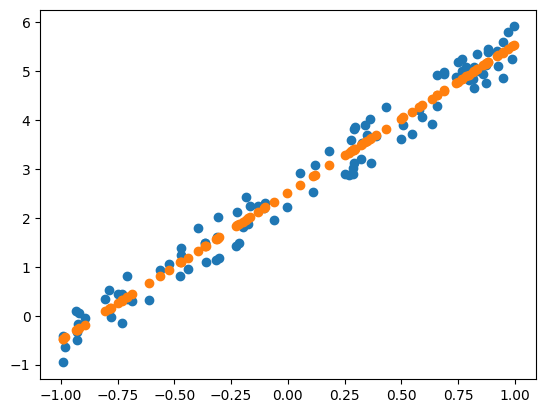

In [23]:
w.requires_grad = False # Disable gradients, otherwise pyplot refuses to plot x@w
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@w);

In [ ]:
from matplotlib import animation, rc
rc('animation', html='jshtml')
w = np.array([-1.,1]).astype(np.float32)
w = torch.as_tensor(w)

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@w)
plt.close()

def animate(i):
    w.requires_grad = True
    update()
    w.requires_grad = False
    line.set_ydata(x@w)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)